<a href="https://colab.research.google.com/github/Kimbaeda/youngwoo/blob/main/7569_%ED%86%A0%EB%A7%88%ED%86%A0(3d_ver).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제
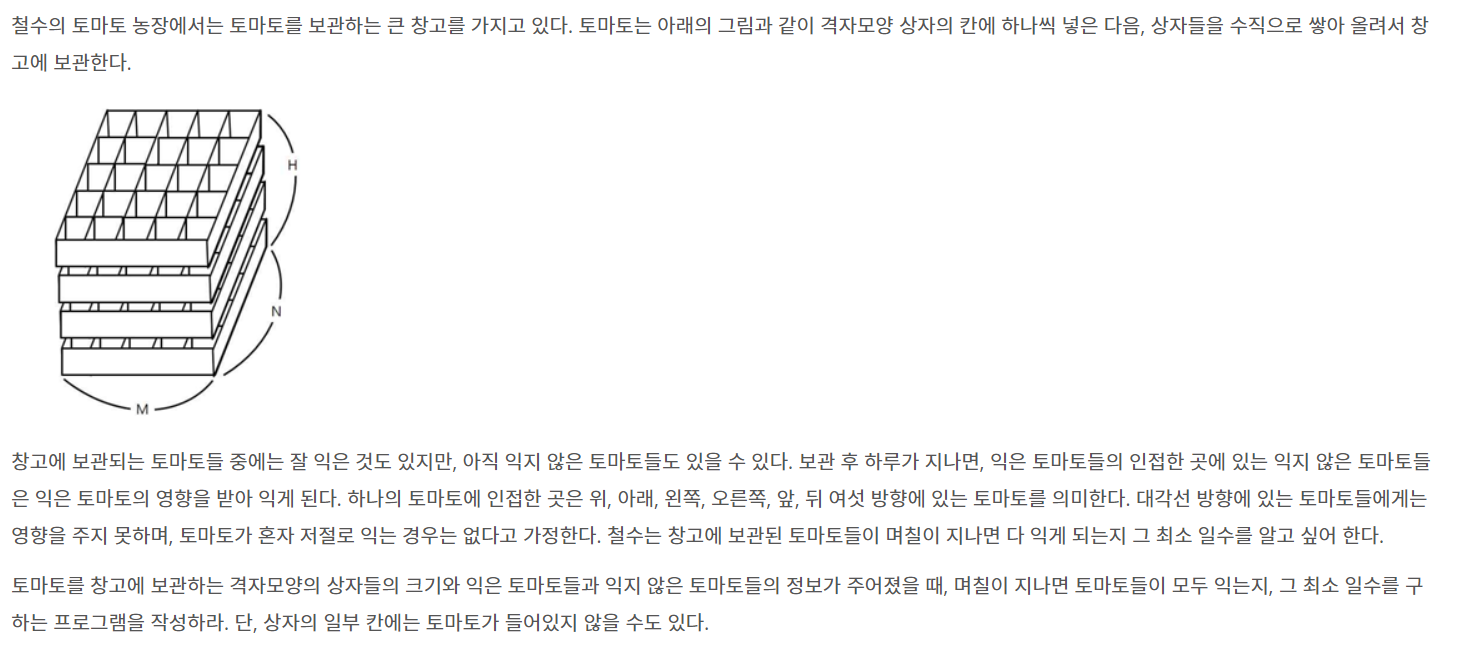

# 입력
첫 줄에는 상자의 크기를 나타내는 두 정수 M,N과 쌓아올려지는 상자의 수를 나타내는 H가 주어진다. M은 상자의 가로 칸의 수, N은 상자의 세로 칸의 수를 나타낸다. 단, 2 ≤ M ≤ 100, 2 ≤ N ≤ 100, 1 ≤ H ≤ 100 이다. 둘째 줄부터는 가장 밑의 상자부터 가장 위의 상자까지에 저장된 토마토들의 정보가 주어진다. 즉, 둘째 줄부터 N개의 줄에는 하나의 상자에 담긴 토마토의 정보가 주어진다. 각 줄에는 상자 가로줄에 들어있는 토마토들의 상태가 M개의 정수로 주어진다. 정수 1은 익은 토마토, 정수 0 은 익지 않은 토마토, 정수 -1은 토마토가 들어있지 않은 칸을 나타낸다. 이러한 N개의 줄이 H번 반복하여 주어진다.

토마토가 하나 이상 있는 경우만 입력으로 주어진다.

# 출력
여러분은 토마토가 모두 익을 때까지 최소 며칠이 걸리는지를 계산해서 출력해야 한다. 만약, 저장될 때부터 모든 토마토가 익어있는 상태이면 0을 출력해야 하고, 토마토가 모두 익지는 못하는 상황이면 -1을 출력해야 한다.

# 예제 입력
```
예제 입력 1

5 3 1
0 -1 0 0 0
-1 -1 0 1 1
0 0 0 1 1
```

```
예제 입력 2

5 3 2
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 1 0 0
0 0 0 0 0
```

```
예제 입력 3

4 3 2
1 1 1 1
1 1 1 1
1 1 1 1
1 1 1 1
-1 -1 -1 -1
1 1 1 -1
```

# 예제 출력

```
예제 출력 1
-1
```

```
예제 출력 2
4
```

```
예제 출력3
0
```

In [ ]:
 from _collections import deque
 import sys

dx, dy, dz = [-1, 1, 0, 0, 0, 0], [0, 0, -1, 1, 0, 0], [0, 0, 0, 0, -1, 1]  # 아래층 윗층 앞 뒤 좌 우


# BFS로 주변 토마토 익히기
def ripen():
    while q:
        x, y, z = q.popleft()
        for k in range(6):
            nx = x + dx[k]
            ny = y + dy[k]
            nz = z + dz[k]
            if 0 <= nx < H and 0 <= ny < M and 0 <= nz < N:
                if box[nx][ny][nz] == 0:
                    box[nx][ny][nz] = box[x][y][z] + 1
                    q.append((nx, ny, nz))


# 0이 있을 경우 토마토는 다 익지 못함, 0이 없으면 day를 return
def check_ripen():
    max_day = 0
    for i in range(H):
        for j in range(M):
            for k in range(N):
                if box[i][j][k] == 0:
                    return -1
                else:
                    max_day = max(max_day, box[i][j][k])

    return max_day - 1

input = sys.stdin.readline

# 시작
N, M, H = map(int, input().split())

# 토마토 상자 채우기
box = []
for i in range(H):
    step = [list(map(int, input().split())) for _ in range(M)]
    box.append(step)


# 익은 토마토 찾기
q = deque()
for i in range(H):
    for j in range(M):
        for k in range(N):
            if box[i][j][k] == 1:
                q.append((i, j, k))


ripen()
answer = check_ripen()
print(answer)

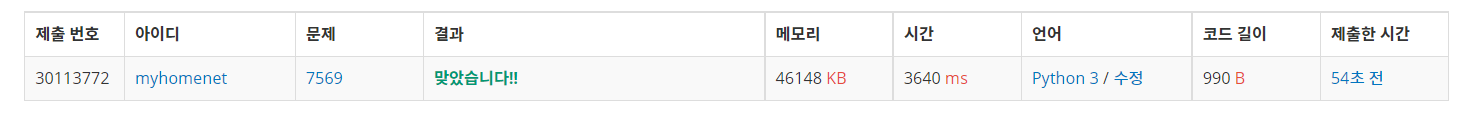